In [ ]:
!pip install '/content/pyGPB-0.0.1-py3-none-any.whl'

Processing ./pyGPB-0.0.1-py3-none-any.whl


In [ ]:
from pyGPB import GPB, LFGPB
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from scipy.stats import norm

In [ ]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [ ]:
df = pd.read_csv('/content/portfolio.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   28 non-null     object 
 1   rating    28 non-null     object 
 2   gdp       28 non-null     int64  
 3   gdp_prev  28 non-null     int64  
 4   cds       28 non-null     float64
 5   cds_prev  28 non-null     float64
 6   pd        28 non-null     float64
 7   pd_prev   28 non-null     float64
 8   rr        28 non-null     float64
dtypes: float64(5), int64(2), object(2)
memory usage: 2.1+ KB


In [ ]:
PORTFOLIO_VALUE = 1_000_000

In [ ]:
df['investment'] = np.around(PORTFOLIO_VALUE*df.gdp/(df.gdp.sum()),2)
df['investment_prev'] = np.around(PORTFOLIO_VALUE*df.gdp_prev/(df.gdp_prev.sum()),2)

In [ ]:
df['lgd'] = np.around(df.investment * (1-df.rr)).astype(np.int32)
df['lgd_prev'] = np.around(df.investment_prev * (1-df.rr)).astype(np.int32)

In [ ]:
df

,country,rating,gdp,gdp_prev,cds,cds_prev,pd,pd_prev,rr,investment,investment_prev,lgd,lgd_prev
0,Denmark,AAA,355,350,7.48,7.910321,0.006376,0.006741,0.40,5182.48,4988.53,3109,2993
1,Sweden,AAA,538,531,8.51,10.879570,0.007250,0.009260,0.40,7854.01,7568.31,4712,4541
2,United Kingdom,AA,2708,2831,9.08,15.330069,0.007734,0.013023,0.40,39532.85,40350.05,23720,24210
3,Austria,AA+,429,445,9.71,9.829925,0.008268,0.008370,0.40,6262.77,6342.55,3758,3806
4,United States,AA+,20937,21433,10.00,10.099990,0.008370,0.008599,0.40,305649.64,305483.10,183390,183290
5,Germany,AAA,3806,3861,10.20,10.200000,0.008684,0.008684,0.40,55562.04,55030.57,33337,33018
6,Netherlands,AAA,912,907,10.30,10.300000,0.008769,0.008769,0.40,13313.87,12927.41,7988,7756
7,Norway,AAA,362,406,10.40,10.000000,0.008853,0.008514,0.40,5284.67,5786.69,3171,3472
8,Belgium,AA,515,533,12.20,12.099574,0.010378,0.010293,0.40,7518.25,7596.81,4511,4558
9,Ireland,AA-,419,399,14.50,14.400636,0.012322,0.012238,0.40,6116.79,5686.92,3670,3412


# Current Exposure Profile

In [ ]:
rv = GPB(probs = df.pd, weights = df.lgd)

In [ ]:
support_vec = np.arange(0, rv.support_end+1, dtype=np.float64)

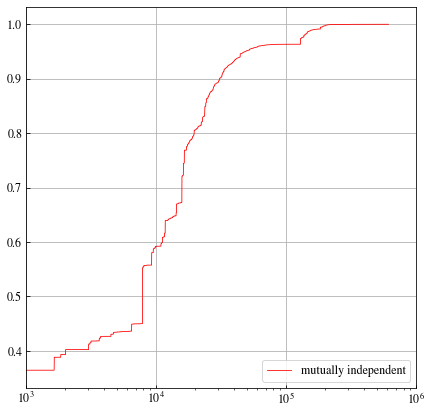

In [ ]:
plt.plot(support_vec, rv.cdf_vec, linewidth=0.8, label='mutually independent', color='red')
plt.xscale('log')
plt.tick_params(labelsize=12, direction='in')
plt.grid(axis='both', linewidth=0.8)
plt.xlim(left=1000, right=1e6)
fig = plt.gcf()
fig.set_size_inches(7, 7)
ax = fig.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.8)
ax.legend(loc='lower right', fontsize=12)
#plt.savefig('line_plot.pdf')
plt.show()

In [ ]:
plt.savefig('line_plot.pdf')

<Figure size 432x288 with 0 Axes>

In [ ]:
rv.mean(), rv.std()

(15289.789402999993, 29781.016845312413)

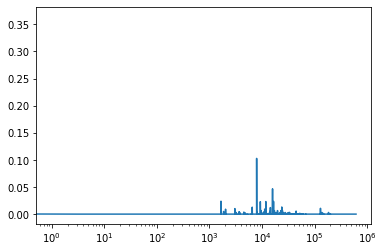

In [ ]:
plt.plot(support_vec, rv.pmf_vec)
plt.xscale('log')

In [ ]:
log_space_cdf_summary_points = sorted(set(np.logspace(0,np.log10(rv.support_end +1), 10000, dtype=np.int32)) | {0})
log_space_cdf_summary_values = rv.cdf(log_space_cdf_summary_points)

In [ ]:
pd.DataFrame({'x': log_space_cdf_summary_points, 'cdf':log_space_cdf_summary_values}).to_csv('log_cdf_summary.csv', index=False, sep='\t')

In [ ]:
rv.support_end +1

611646

In [ ]:
quantile_points = np.linspace(0.05,1,20)
quantile_points = np.sort(np.append(quantile_points,[0.99,0.999]))
quantile_points

array([0.05 , 0.1  , 0.15 , 0.2  , 0.25 , 0.3  , 0.35 , 0.4  , 0.45 ,
       0.5  , 0.55 , 0.6  , 0.65 , 0.7  , 0.75 , 0.8  , 0.85 , 0.9  ,
       0.95 , 0.99 , 0.999, 1.   ])

In [ ]:
# Quantile Summary
pd.DataFrame({'quantile_point':quantile_points, 'quantile_value': rv.ppf(quantile_points)})

,quantile_point,quantile_value
0,0.050,0.0
1,0.100,0.0
2,0.150,0.0
3,0.200,0.0
4,0.250,0.0
5,0.300,0.0
6,0.350,0.0
7,0.400,2023.0
8,0.450,7751.0
9,0.500,7883.0


# Risk under different correlation assumptions

In [ ]:
quantiles = {'points': quantile_points}
tail_risks = {'points': quantile_points}
cdfs = {'x': support_vec}
pmfs = {'x': support_vec}

In [ ]:
def expected_tail_value(rv, quantile_point):
    quantile_val = rv.ppf(quantile_point).astype(int)
    tail_support = np.arange(quantile_val, rv.support_end+1)
    tail_pmf = rv.pmf_vec[quantile_val:]
    exp_val = np.sum(tail_support * tail_pmf) / np.sum(tail_pmf)
    return exp_val

In [ ]:
for rho in [0,0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9]:
    lrv = LFGPB(probs=df.pd,weights=df.lgd, rho=rho)
    quantiles[f'quantile_rho_{rho}'] = lrv.ppf(quantile_points)
    tail_risks[f'tail_exp_rho_{rho}'] = [expected_tail_value(rv, quantile_point) for quantile_point in quantile_points]
    cdfs[f'cdf_rho_{rho}'] = lrv.cdf_vec
    pmfs[f'pmf_rho_{rho}'] = lrv.pmf_vec
    print(rho)

0
0.1
0.2
0.3
0.4
0.5
0.7
0.8
0.9


In [ ]:
quant_df = pd.DataFrame(quantiles)
quant_df

,points,quantile_rho_0,quantile_rho_0.1,quantile_rho_0.2,quantile_rho_0.3,quantile_rho_0.4,quantile_rho_0.5,quantile_rho_0.7,quantile_rho_0.8,quantile_rho_0.9
0,0.050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.400,2023.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.450,7751.0,1857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.500,7883.0,7883.0,1655.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tail_df = pd.DataFrame(tail_risks)
tail_df

,points,tail_exp_rho_0,tail_exp_rho_0.1,tail_exp_rho_0.2,tail_exp_rho_0.3,tail_exp_rho_0.4,tail_exp_rho_0.5,tail_exp_rho_0.7,tail_exp_rho_0.8,tail_exp_rho_0.9
0,0.050,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403
1,0.100,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403
2,0.150,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403
3,0.200,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403
4,0.250,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403
5,0.300,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403
6,0.350,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403,15289.789403
7,0.400,25121.990603,25121.990603,25121.990603,25121.990603,25121.990603,25121.990603,25121.990603,25121.990603,25121.990603
8,0.450,27285.150167,27285.150167,27285.150167,27285.150167,27285.150167,27285.150167,27285.150167,27285.150167,27285.150167
9,0.500,27288.755864,27288.755864,27288.755864,27288.755864,27288.755864,27288.755864,27288.755864,27288.755864,27288.755864


In [ ]:
cdf_df = pd.DataFrame(cdfs)
cdf_df

,x,cdf_rho_0,cdf_rho_0.1,cdf_rho_0.2,cdf_rho_0.3,cdf_rho_0.4,cdf_rho_0.5,cdf_rho_0.7,cdf_rho_0.8,cdf_rho_0.9
0,0.0,0.36457,0.430077,0.486907,0.53772,0.584071,0.626894,0.703758,0.737663,0.766556
1,1.0,0.36457,0.430077,0.486907,0.53772,0.584071,0.626894,0.703758,0.737663,0.766556
2,2.0,0.36457,0.430077,0.486907,0.53772,0.584071,0.626894,0.703758,0.737663,0.766556
3,3.0,0.36457,0.430077,0.486907,0.53772,0.584071,0.626894,0.703758,0.737663,0.766556
4,4.0,0.36457,0.430077,0.486907,0.53772,0.584071,0.626894,0.703758,0.737663,0.766556
...,...,...,...,...,...,...,...,...,...,...
611641,611641.0,1.00000,1.000000,1.000000,1.00000,1.000000,0.999998,0.999914,0.999640,0.998680
611642,611642.0,1.00000,1.000000,1.000000,1.00000,1.000000,0.999998,0.999914,0.999640,0.998680
611643,611643.0,1.00000,1.000000,1.000000,1.00000,1.000000,0.999998,0.999914,0.999640,0.998680
611644,611644.0,1.00000,1.000000,1.000000,1.00000,1.000000,0.999998,0.999914,0.999640,0.998680


In [ ]:
quant_df.to_csv('quantiles_for_rho.csv')
tail_df.to_csv('tail_risks_for_rho.csv')
cdf_df.to_csv('cdf_for_rho.csv', index=False, sep='\t')

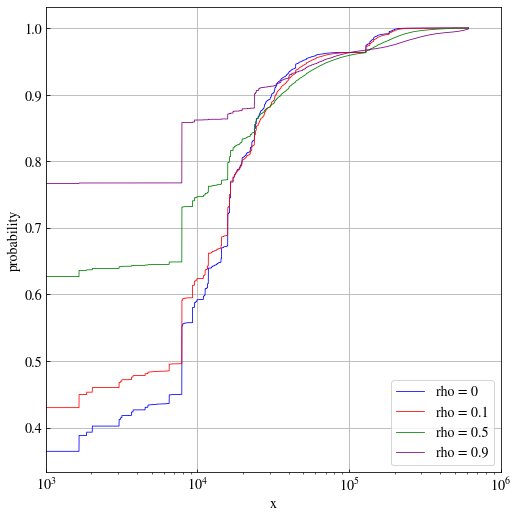

In [ ]:
plt.plot(support_vec, cdf_df.cdf_rho_0, linewidth=0.8, label='rho = 0', color='blue')
plt.plot(support_vec, cdf_df['cdf_rho_0.1'], linewidth=0.8, label='rho = 0.1', color='red')
plt.plot(support_vec, cdf_df['cdf_rho_0.5'], linewidth=0.8, label='rho = 0.5', color='green')
plt.plot(support_vec, cdf_df['cdf_rho_0.9'], linewidth=0.8, label='rho = 0.9', color='purple')
plt.xscale('log')
plt.tick_params(labelsize=14, direction='in')
plt.grid(axis='both', linewidth=0.8)
plt.xlim(left=1000, right=1e6)
fig = plt.gcf()
fig.set_size_inches(7, 7)
ax = fig.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.8)
ax.legend(loc='lower right', fontsize=14)
plt.xlabel("x", fontsize=14)
plt.ylabel("probability", fontsize=14)
plt.tight_layout(pad=0)
plt.savefig('cdf_plot.pdf')
plt.show()

In [ ]:
rv = GPB(probs = df.pd, weights = df.lgd)

In [ ]:
CHUNK_SIZE = 1000
support_vec_chunks = support_vec[::CHUNK_SIZE].astype(np.int32)

In [ ]:
cdf_summary_00 = cdfs['cdf_rho_0'][support_vec_chunks]
cdf_summary_01 = cdfs['cdf_rho_0.1'][support_vec_chunks]
cdf_summary_05 = cdfs['cdf_rho_0.5'][support_vec_chunks]
cdf_summary_09 = cdfs['cdf_rho_0.9'][support_vec_chunks]

In [ ]:
cdf_summary_00[0] = 0
cdf_summary_01[0] = 0
cdf_summary_05[0] = 0
cdf_summary_09[0] = 0

In [ ]:
pmf_summary_00 = np.diff(cdf_summary_00)
pmf_summary_01 = np.diff(cdf_summary_01)
pmf_summary_05 = np.diff(cdf_summary_05)
pmf_summary_09 = np.diff(cdf_summary_09)

In [ ]:
pmf_summary_support = support_vec_chunks[:-1]+CHUNK_SIZE/2

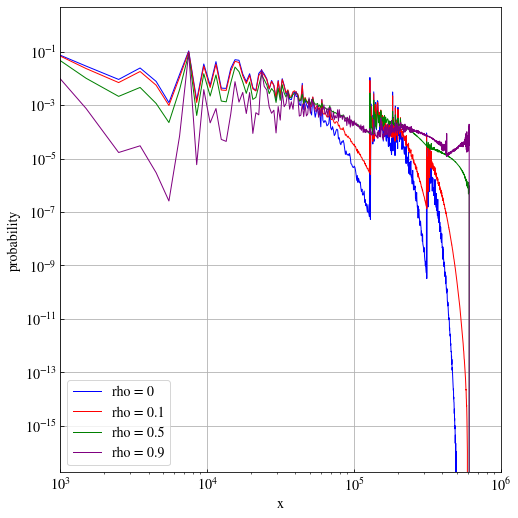

In [ ]:
plt.plot(pmf_summary_support,pmf_summary_00, linewidth=1, label='rho = 0', color='blue')
plt.plot(pmf_summary_support,pmf_summary_01, linewidth=1, label='rho = 0.1', color='red')
plt.plot(pmf_summary_support,pmf_summary_05, linewidth=1, label='rho = 0.5', color='green')
plt.plot(pmf_summary_support,pmf_summary_09, linewidth=1, label='rho = 0.9', color='purple')
# plt.fill_between(support_vec,pmfs['pmf_rho_0.1'], linewidth=0.1, label='rho = 0', color='red')
# plt.fill_between(support_vec,pmfs['pmf_rho_0.5'], linewidth=0.1, label='rho = 0', color='green')
# plt.fill_between(support_vec,pmfs['pmf_rho_0.9'], linewidth=0.1, label='rho = 0', color='purple')
#plt.plot(support_vec, cdf_df['cdf_rho_0.1'], linewidth=0.8, label='rho = 0.1', color='red')
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=14, direction='in')
plt.grid(axis='both', linewidth=0.8)
plt.xlim(left=1000, right=1e6)
fig = plt.gcf()
fig.set_size_inches(7, 7)
ax = fig.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.8)
ax.legend(loc='lower left', fontsize=14)
plt.xlabel("x", fontsize=14)
plt.ylabel("probability", fontsize=14)
plt.tight_layout(pad=0)
plt.savefig('pmf_plot.pdf')
plt.show()

# Change over Time

In [ ]:
rv_prev = GPB(probs = df.pd_prev, weights = df.lgd_prev)

In [ ]:
support_vec_prev = np.arange(0, rv_prev.support_end+1, dtype=np.float64)

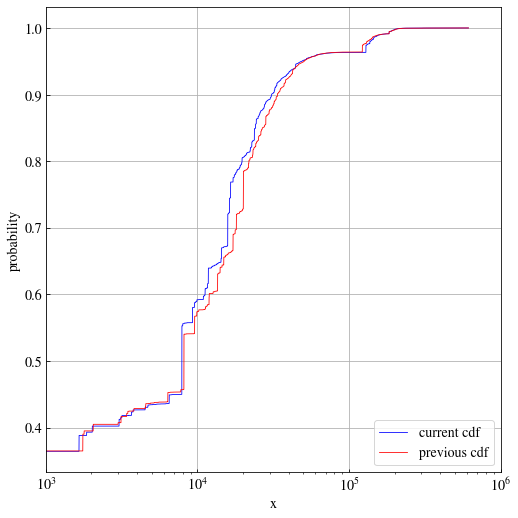

In [ ]:
plt.plot(support_vec, rv.cdf_vec, linewidth=0.8, label='current cdf', color='blue')
plt.plot(support_vec_prev, rv_prev.cdf_vec,  linewidth=0.8, label='previous cdf', color='red')
plt.xscale('log')
plt.tick_params(labelsize=14, direction='in')
plt.grid(axis='both', linewidth=0.8)
plt.xlim(left=1000, right=1e6)
fig = plt.gcf()
fig.set_size_inches(7, 7)
ax = fig.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.8)
ax.legend(loc='lower right', fontsize=14)
plt.xlabel("x", fontsize=14)
plt.ylabel("probability", fontsize=14)
plt.tight_layout(pad=0)
plt.savefig('cdf_plot_change.pdf')
plt.show()

In [ ]:
cdf_summary_prev = rv_prev.cdf_vec[support_vec_chunks]
cdf_summary_prev[0] = 0
pmf_summary_prev = np.diff(cdf_summary_prev)

In [ ]:
support_vec_chunks.shape

(612,)

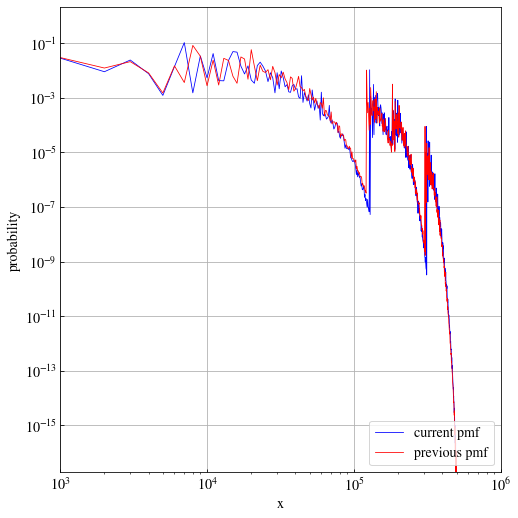

In [ ]:
plt.plot(support_vec_chunks[:-1], pmf_summary_00, linewidth=0.8, label='current pmf', color='blue')
plt.plot(support_vec_chunks[:-1], pmf_summary_prev,  linewidth=0.8, label='previous pmf', color='red')
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=14, direction='in')
plt.grid(axis='both', linewidth=0.8)
plt.xlim(left=1000, right=1e6)
fig = plt.gcf()
fig.set_size_inches(7, 7)
ax = fig.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.8)
ax.legend(loc='lower right', fontsize=14)
plt.xlabel("x", fontsize=14)
plt.ylabel("probability", fontsize=14)
plt.tight_layout(pad=0)
plt.savefig('pmf_plot_change.pdf')
plt.show()

# Explaining changes: example using 10% tail risk (i.e. expected value of worst 10% tail)

In [ ]:
TAIL_POINT = 0.9

In [ ]:
# Current Value
tail_risk = expected_tail_value(rv, TAIL_POINT)
tail_risk

82307.62882191273

In [ ]:
# Previous Value
tail_risk_prev = expected_tail_value(GPB(probs=df.pd_prev, weights=df.lgd_prev), TAIL_POINT)
tail_risk_prev

80836.6186690194

In [ ]:
# Change in tail risk to explain
tail_risk - tail_risk_prev 

1471.01015289333

In [ ]:
def tail_risk(countries_probs, countries_weights, prev):
    # return tail risk for a scenario
    # if prev=True then scenario is specified by supplying a set of countries
    # on the previous values, with the rest assumed to be on current values
    # if prev=False then the scenario is specified by supplying a set of 
    # countries that have changed to current values with the rest assumed
    # to still be on the previous values
    
    probs_mask = np.isin(df.country.values, list(countries_probs))
    weights_mask = np.isin(df.country.values, list(countries_weights))
    if prev:
        probs = np.where(probs_mask, df.pd_prev, df.pd)
        weights = np.where(weights_mask, df.lgd_prev, df.lgd)
    else:
        probs = np.where(probs_mask, df.pd, df.pd_prev)
        weights = np.where(weights_mask, df.lgd, df.lgd_prev)
    rv = GPB(probs, weights)
    return expected_tail_value(rv, TAIL_POINT)

In [ ]:
def incremental_impacts(forwards = True):
    # Calculate incremental impact of changing one element at a time until the 
    # full portfolio has changed
    # At each point the next element to add is chosen based on the biggest impact
    # of all potential elements to add
    # If forwards is True then the portfolio starts with the old values and 
    # is incrementally changed to the new values
    # If forwards is False then the portfolio starts with the new values and
    # is incrementally changed back to the old values

    # baseline set of countries
    countries_baseline = set(df.country.values)

    # Keep going while there are countries left to change
    while countries_baseline:
        # current tail with the extent portfolio
        baseline_risk = tail_risk(countries_baseline, countries_baseline, forwards)

        # Check each remaining element to see which provides the biggest change
        impacts = {}
        for country in countries_baseline:
            putative_countries = countries_baseline - {country}
            scenario_risk = tail_risk(putative_countries, putative_countries, forwards)
            scenario_impact = baseline_risk - scenario_risk
            impacts[country] = (abs(scenario_impact), scenario_impact)
        
        # Get the element that provides the biggest impact
        biggest_impact_country = max(impacts, key=impacts.get)
        putative_countries = countries_baseline - {biggest_impact_country}

        # Get the impact of just changing the pd or the lgd alone
        pd_change_impact = baseline_risk - tail_risk(putative_countries, countries_baseline, forwards)
        lgd_change_impact = baseline_risk - tail_risk(countries_baseline, putative_countries, forwards)

        # Calculate the cross effect of changing both together
        total_change_impact = impacts[biggest_impact_country][1]
        cross_change_impact = total_change_impact - pd_change_impact - lgd_change_impact
        
        # Flip impact sign if going forwards. After this a postive value will always
        # Represent an increase in risk going forwards in time.

        if forwards:
            pd_change_impact *= -1
            lgd_change_impact *= -1
            total_change_impact *= -1
            cross_change_impact *= -1

        # output the results
        print(biggest_impact_country, pd_change_impact, lgd_change_impact, cross_change_impact, total_change_impact, sep='\t')

        # remove lastest country from portfolio as already changed
        countries_baseline -= {biggest_impact_country}        


In [ ]:
incremental_impacts(forwards =True)

China	415.35061864502495	1849.2764072976715	38.43217680603266	2303.059202748729
Japan	1834.0378835805604	248.92378144571558	50.53299975642585	2133.494664782702
United Kingdom	-1779.9115148302517	-10.559988656808855	116.78665770526277	-1673.6848457817978
Turkey	1778.3870089936972	-6.604945398605196	-16.85481782029092	1754.9272457748011
Brazil	-1181.7626710743061	-1369.126677299224	1039.334788734559	-1511.554559638971
Mexico	-209.33008546019846	-389.4795401418087	-47.06736086656747	-645.8769864685746
France	508.998994530004	-25.171625816597953	-20.96383500167576	462.86353371173027
United States	-384.175731256124	8.587899484176887	-0.23117168791941367	-375.8190034598665
Russia	-0.27159183952608146	-357.44432020124805	46.98375283493078	-310.73215920584335
Spain	-357.86565925103787	-22.85845341057575	36.72965097603446	-343.99446168557915
Canada	-55.01789555441064	-131.0894061268482	-0.764903600604157	-186.872205281863
Netherlands	-0.0	415.77038577019994	-0.0	415.77038577019994
Sweden	-472.7

In [ ]:
incremental_impacts(forwards =False)

China	1509.0133026536496	1942.8980843902536	-77.96876055355824	3373.942626490345
Brazil	-754.8543098605005	-2090.5748140877695	890.623996461014	-1954.805127487256
Mexico	-549.6659019115032	499.4226184809959	-701.7934364232351	-752.0367198537424
Japan	1063.0723792988283	300.4930425717466	-46.76050065580057	1316.8049212147744
Russia	144.43818222248228	517.3707774028444	-1581.4932882136345	-919.6843285883078
Turkey	1366.6651060172735	12.480757438024739	0.9500025624583941	1380.0958660177566
South Korea	-1299.0827593710856	3.4581972267769743	2.6925186045118608	-1292.9320435397967
France	1220.9204102814401	-35.183698596898466	27.2045262210886	1212.9412379056303
United Kingdom	-1207.1324249458266	69.20170482157846	-56.387416436948115	-1194.3181365611963
Indonesia	120.39942221085948	125.96141941938549	13.18244470882928	259.54328633907426
United States	-266.32142898082384	8.278359208488837	0.2090671062032925	-257.8340026661317
Spain	129.44117943113088	61.796464895727695	11.480020699207671	202.7

In [ ]:
for country in df.country:
    mask = df.country == country
    pd = df.pd[mask].values[0]
    pd_delta = pd - df.pd_prev[mask].values[0]
    inv = df.investment[mask].values[0]
    inv_delta = inv - df.investment_prev[mask].values[0]
    print(country.replace(' ','_'), pd, pd_delta, inv, inv_delta, sep='\t')

Denmark	0.006376	-0.0003649999999999999	5182.48	193.94999999999982
Sweden	0.00725	-0.0020099999999999988	7854.01	285.6999999999998
United_Kingdom	0.007734	-0.005288999999999998	39532.85	-817.2000000000044
Austria	0.008268000000000001	-0.00010199999999999966	6262.77	-79.77999999999975
United_States	0.00837	-0.0002289999999999983	305649.64	166.54000000003725
Germany	0.008684	0.0	55562.04	531.4700000000012
Netherlands	0.008768999999999999	0.0	13313.87	386.46000000000095
Norway	0.008853	0.000338999999999999	5284.67	-502.0199999999995
Belgium	0.010378	8.5e-05	7518.25	-78.5600000000004
Ireland	0.012322	8.400000000000074e-05	6116.79	429.8699999999999
Australia	0.0132	0.0008190000000000003	19430.66	-480.6899999999987
New_Zealand	0.013335	0.00025299999999999975	3094.89	116.02999999999975
South_Korea	0.014969999999999999	-0.005602000000000001	23810.22	335.6399999999994
Japan	0.015105	0.0021920000000000012	73941.61	3318.3300000000017
France	0.017628	0.004124000000000003	38000.0	-710.9599999999991